In [1]:
import pandas as pd
import numpy as np
import os
import pickle
import datetime
from datetime import date
from datetime import datetime
from sklearn.model_selection import train_test_split
from itertools import combinations_with_replacement
from itertools import combinations
from itertools import permutations
from itertools import product 
import random
import csv
import matplotlib.mlab as mlab
import scipy.linalg as lng # linear algebra from scipy library
import matplotlib . pyplot as plt # library for plots
import matplotlib.animation as animation # lets animate the plots!
from matplotlib.pyplot import figure

In [8]:
# setting saving directory
today = date.today()
now = datetime.now()
print (today)
print (now)
dt_string = now.strftime("%d-%m-%Y_%H-%M-%S") #do not put : or similar 
print("date and time =", dt_string)	    
root = "C:/Users/arita/Documents/private/Data Engineering/2semestre/Stochastic_modeling/Project/data/outputs"

#saving function
def saveAsCSV(df,name,rootdir = root):
    """
    df = dataframe
    name = name for saving in format: 'thisisthename.csv'
    rootdir = local saving directory, default is root
    """
    dt_string = now.strftime("%d-%m-%Y_%H-%M-%S")
    savepath = rootdir +'/' + dt_string+'_'+ name 
    df.to_csv ( savepath, index = False, header=True)


#loading function
def loadCSV(name,rootdir = root):
    """
    rootdir = local saving directory, default is root
    name = exact name (including datetime and extention .csv)
    """
    loadpath = rootdir +'/'+ name 
    print ("loading: ",loadpath)
    file = pd.read_csv(loadpath)
    return file

2020-06-21
2020-06-21 15:28:30.683789
date and time = 21-06-2020_15-28-30


In [3]:
os.getcwd()

'C:\\Users\\arita\\Documents\\GitHub\\02443-SimSolarEnergy\\code'

In [4]:
os.chdir('C:\\Users\\arita\\Documents\\GitHub\\02443-SimSolarEnergy\\code\\activityLists')

In [6]:
with open('SimActivities_1_People__NumOfDays_365.csv','rb') as f:
    container_activityLists = pickle.load(f)

In [28]:
num_people= len(container_activityLists)
numactivities = len(container_activityLists[0])

In [34]:
days = np.floor(numactivities/143)

In [10]:
root = "C:/Users/arita/Documents/private/Data Engineering/2semestre/Stochastic_modeling/Project/data"
table_activity_power = loadCSV('activity_code.csv',root)

loading:  C:/Users/arita/Documents/private/Data Engineering/2semestre/Stochastic_modeling/Project/data/activity_code.csv


In [23]:
table_activity_power

,code,activity,a2p,a2p_per10minutes
0,0,personal-care,0.01,0.001667
1,1,employment,4.00,0.666667
2,2,study,3.00,0.500000
3,3,household-care,2.00,0.333333
4,4,volunteer-work,3.50,0.583333
5,5,entertainment,5.00,0.833333
6,6,outdoor-activity,1.00,0.166667
7,7,hobbies,2.50,0.416667
8,8,media,5.50,0.916667
9,9,travel,1.50,0.250000


In [19]:
table_activity_power.a2p[1]

4.0

In [21]:
type(container_activityLists[0][2])

int

In [22]:
table_activity_power['a2p_per10minutes']= table_activity_power.a2p/6

In [26]:
container_power_cosumption=[[] for i in range(num_people)]

counter = 0
for activityList in container_activityLists: #one activityList per person
    power_cosumption_per_person= []
    for activity in activityList: #all the activities of one person
        #a2p = table_activity_power.a2p[activity]
        power = table_activity_power.a2p_per10minutes[activity]
        power_cosumption_per_person.append(power)
    container_power_cosumption[counter]= power_cosumption_per_person
    counter +=1


<Figure size 720x1080 with 0 Axes>

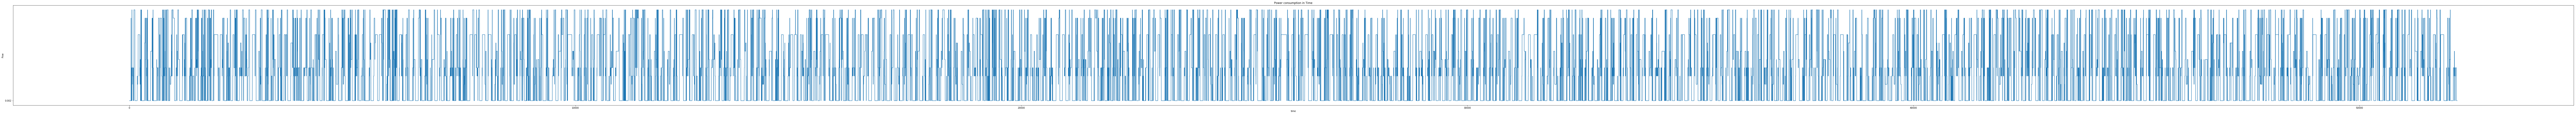

In [36]:
Pow = container_power_cosumption[0]
#plot
fig = plt.figure(figsize=(10, 15))
#fig.suptitle('Power consumption')
    
plot_lenght = days*7
plot_height = 4
if plot_lenght>200:
    plot_lenght= 200
    plot_height = 8
figure(figsize=(plot_lenght,plot_height))
T = np.arange(numactivities)

plt.plot(T, Pow)
plt.title('Power consumption in Time')
plt.xlabel('time')
plt.ylabel('Pow')
plt.yticks(np.arange(min(Pow), max(Pow), 1))
plt.grid(axis='Pow')#, linestyle='-')


In [37]:
print(max(Pow))
print(min(Pow))
print(np.mean(Pow))

0.9166666666666666
0.0016666666666666668
0.3084083710118273
